# Exc. 05 - AI in Finance: Tree-based methods

At first, we set up our environment.

In [18]:
## basic libraries:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import math
import matplotlib

## models:
from sklearn import tree
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [19]:
# settings
matplotlib.rcParams['figure.figsize'] = (20, 10)


In [20]:
oct = pd.read_csv("../data/oct.csv").drop(['Unnamed: 0'], axis=1)  # test data
ocr = pd.read_csv("../data/ocr.csv").drop(['Unnamed: 0'], axis=1)  # train data
pred = pd.read_csv("../data/pred.csv").drop(['Unnamed: 0'], axis=1)  # predictive accuracy

## 1 Decision Tree

In [21]:
tree_m1 = tree.DecisionTreeRegressor(max_depth=3)  # initialize the class
tree_m1 = tree_m1.fit(ocr[['km', 'man']], ocr[['price']])  # fit on the data

[Text(0.5, 0.875, 'km <= 186.267\nsquared_error = 33438371.865\nsamples = 720\nvalue = 13696.583'),
 Text(0.25, 0.625, 'km <= 124.055\nsquared_error = 25275459.088\nsamples = 444\nvalue = 16421.351'),
 Text(0.125, 0.375, 'km <= 48.396\nsquared_error = 30475709.692\nsamples = 153\nvalue = 19993.033'),
 Text(0.0625, 0.125, 'squared_error = 52355087.898\nsamples = 31\nvalue = 24838.194'),
 Text(0.1875, 0.125, 'squared_error = 17435364.184\nsamples = 122\nvalue = 18761.885'),
 Text(0.375, 0.375, 'man <= 0.5\nsquared_error = 12307579.65\nsamples = 291\nvalue = 14543.457'),
 Text(0.3125, 0.125, 'squared_error = 8762816.335\nsamples = 163\nvalue = 15870.276'),
 Text(0.4375, 0.125, 'squared_error = 11724973.262\nsamples = 128\nvalue = 12853.836'),
 Text(0.75, 0.625, 'km <= 218.03\nsquared_error = 15412961.475\nsamples = 276\nvalue = 9313.261'),
 Text(0.625, 0.375, 'man <= 0.5\nsquared_error = 12665629.738\nsamples = 115\nvalue = 11731.035'),
 Text(0.5625, 0.125, 'squared_error = 9735958.655\ns

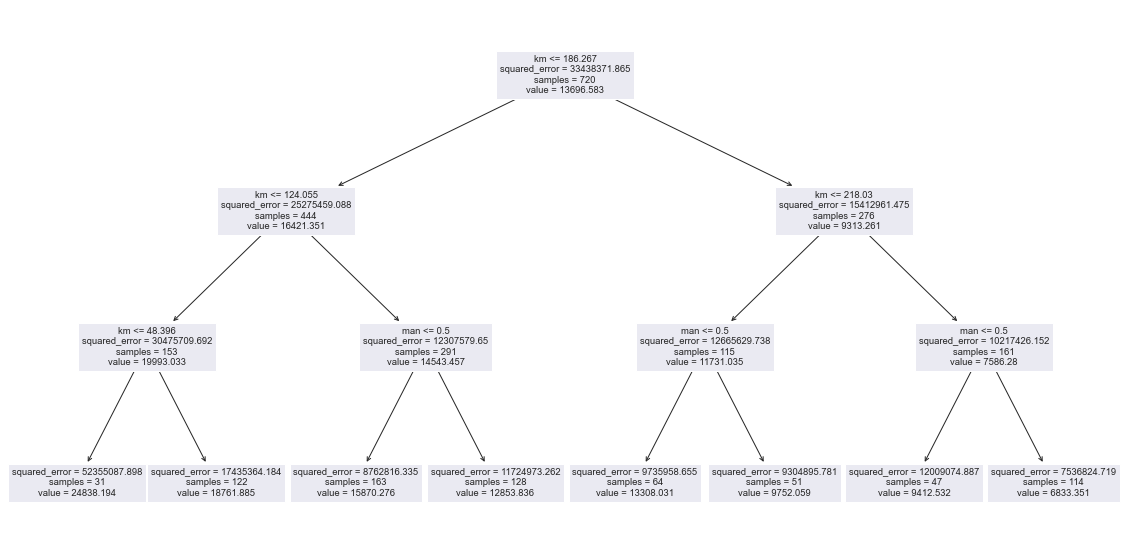

In [22]:
tree.plot_tree(tree_m1, feature_names=['km', 'man'])

In [6]:
pred['m1_tree'] = tree_m1.predict(oct[['km', 'man']])
pred.apply(lambda x: mse(x, pred.iloc[:,0])).sort_values()

True       0.000000e+00
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
p3         6.951479e+06
p2         1.093122e+07
m1_tree    1.141307e+07
p1         1.348618e+07
dtype: float64

## 1.2 Wider Tree

In [23]:
tree_m2 = tree.DecisionTreeRegressor(max_depth=3, ccp_alpha=0.0)
tree_m2 = tree_m2.fit(ocr.drop('price', axis=1), ocr['price'])

[Text(0.5, 0.875, 'age <= 5.5\nsquared_error = 33438371.865\nsamples = 720\nvalue = 13696.583'),
 Text(0.25, 0.625, 'age <= 2.5\nsquared_error = 19461577.056\nsamples = 389\nvalue = 17412.761'),
 Text(0.125, 0.375, 'km <= 72.361\nsquared_error = 25786400.166\nsamples = 30\nvalue = 26820.367'),
 Text(0.0625, 0.125, 'squared_error = 10962652.688\nsamples = 24\nvalue = 28684.75'),
 Text(0.1875, 0.125, 'squared_error = 15562885.806\nsamples = 6\nvalue = 19362.833'),
 Text(0.375, 0.375, 'power_highest <= 0.5\nsquared_error = 10919209.374\nsamples = 359\nvalue = 16626.61'),
 Text(0.3125, 0.125, 'squared_error = 6803229.089\nsamples = 304\nvalue = 15801.786'),
 Text(0.4375, 0.125, 'squared_error = 9124240.195\nsamples = 55\nvalue = 21185.636'),
 Text(0.75, 0.625, 'age <= 9.5\nsquared_error = 14560669.707\nsamples = 331\nvalue = 9329.233'),
 Text(0.625, 0.375, 'power_low <= 0.5\nsquared_error = 8083036.874\nsamples = 188\nvalue = 11848.138'),
 Text(0.5625, 0.125, 'squared_error = 7317894.357\n

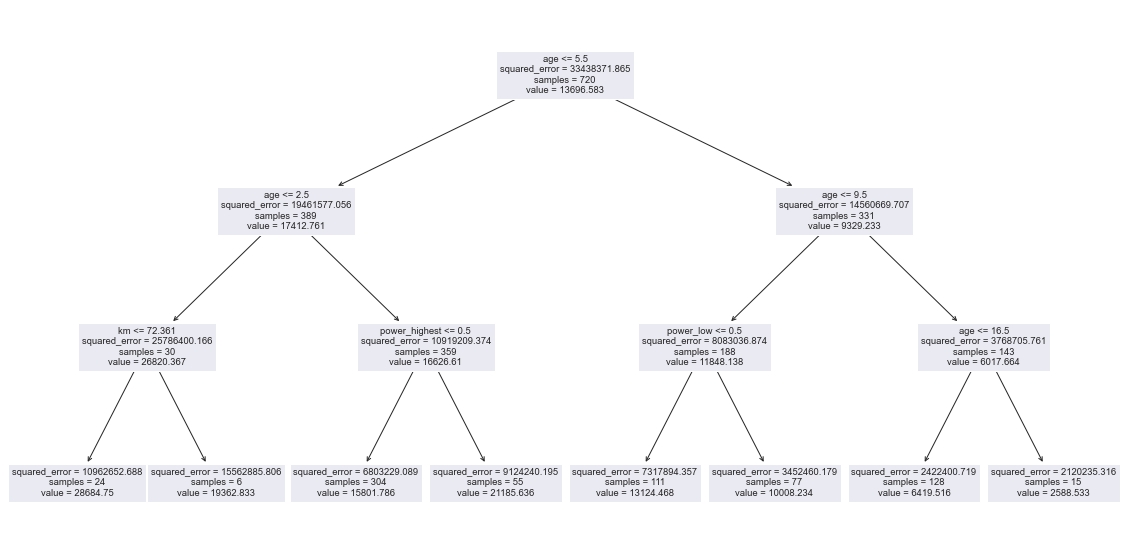

In [24]:
tree.plot_tree(tree_m2, feature_names=ocr.drop('price', axis=1).columns)

In [25]:
def print_mse(colname, model):
    pred[colname] = model.predict(oct[model.feature_names_in_])
    print(pred.apply(lambda x: mse(x, pred.iloc[:,0])).sort_values())

print_mse('tree_m2', tree_m2)

True       0.000000e+00
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
tree_m2    6.052397e+06
p3         6.951479e+06
p2         1.093122e+07
p1         1.348618e+07
dtype: float64


## 1.3 Deep Tree

In [26]:
tree_m3 = tree.DecisionTreeRegressor(max_depth=9, ccp_alpha=0.0)
tree_m3 = tree_m3.fit(ocr.drop('price', axis=1), ocr['price'])

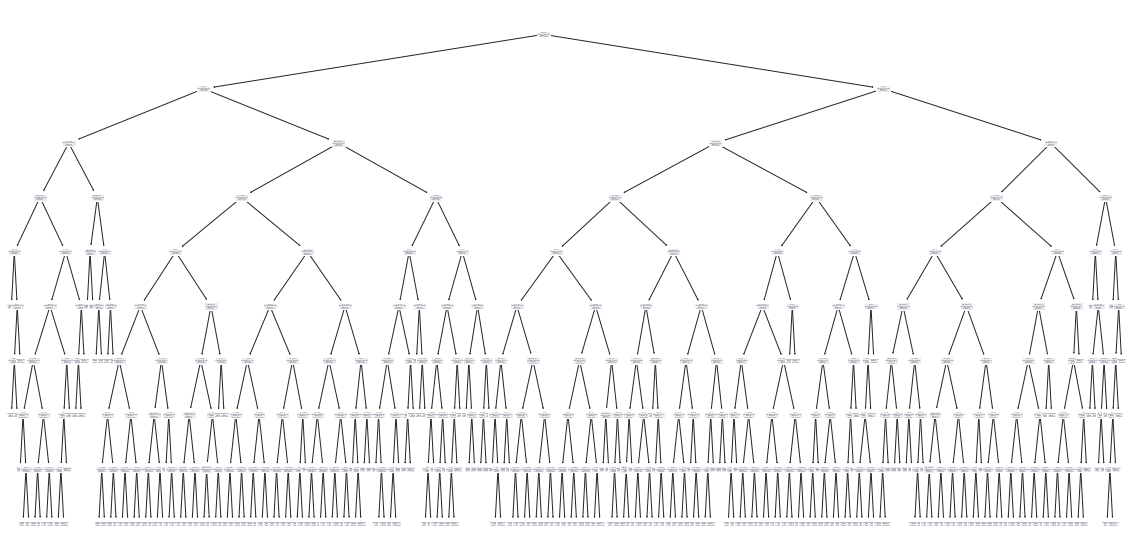

[Text(0.4747721354166667, 0.95, 'age <= 5.5\nsquared_error = 33438371.865\nsamples = 720\nvalue = 13696.583'),
 Text(0.1700439453125, 0.85, 'age <= 2.5\nsquared_error = 19461577.056\nsamples = 389\nvalue = 17412.761'),
 Text(0.050537109375, 0.75, 'km <= 72.361\nsquared_error = 25786400.166\nsamples = 30\nvalue = 26820.367'),
 Text(0.02685546875, 0.65, 'power_high <= 0.5\nsquared_error = 10962652.688\nsamples = 24\nvalue = 28684.75'),
 Text(0.005208333333333333, 0.55, 'diesel <= 0.5\nsquared_error = 10852062.64\nsamples = 5\nvalue = 25757.6'),
 Text(0.0026041666666666665, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 19999.0'),
 Text(0.0078125, 0.45, 'nr <= 0.5\nsquared_error = 3202117.688\nsamples = 4\nvalue = 27197.25'),
 Text(0.005208333333333333, 0.35, 'power_mid <= 0.5\nsquared_error = 803066.889\nsamples = 3\nvalue = 26266.333'),
 Text(0.0026041666666666665, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 24999.0'),
 Text(0.0078125, 0.25, 'squared_error = 0.0\nsamples = 2\nval

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[d

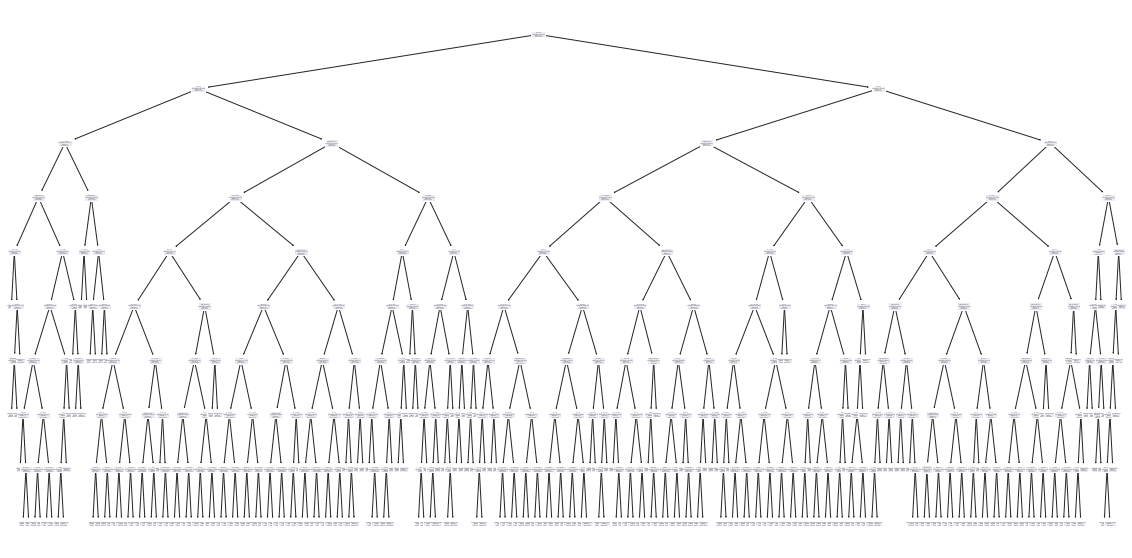

In [27]:
tree.plot_tree(tree_m3, feature_names=tree_m3.feature_names_in_)

In [28]:
print_mse("tree_m3", tree_m3)

True       0.000000e+00
tree_m3    3.101942e+06
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
tree_m2    6.052397e+06
p3         6.951479e+06
p2         1.093122e+07
m1_tree    1.141307e+07
p1         1.348618e+07
dtype: float64
True       0.000000e+00
tree_m3    3.325545e+06
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
tree_m2    6.052397e+06
p3         6.951479e+06
p2         1.093122e+07
p1         1.348618e+07
dtype: float64


## 1.4 Pre-Pruning

In [29]:
tree_m4 = tree.DecisionTreeRegressor(max_depth=9, ccp_alpha=0.02)
tree_m4 = tree_m4.fit(ocr.drop('price', axis=1), ocr['price'])

In [30]:
print_mse("tree_m4", tree_m4)

True       0.000000e+00
tree_m3    3.101942e+06
tree_m4    3.217867e+06
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
tree_m2    6.052397e+06
p3         6.951479e+06
p2         1.093122e+07
m1_tree    1.141307e+07
p1         1.348618e+07
dtype: float64
True       0.000000e+00
tree_m4    3.176251e+06
tree_m3    3.325545e+06
p5         3.352783e+06
EN         4.308822e+06
FE         4.314551e+06
p4         4.347863e+06
BE         4.348023e+06
LASSO      4.362078e+06
RIDGE      4.655928e+06
tree_m2    6.052397e+06
p3         6.951479e+06
p2         1.093122e+07
p1         1.348618e+07
dtype: float64


In [31]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

explainer = RegressionExplainer(tree_m4, oct[tree_m4.feature_names_in_], oct[['price']])

Generating self.shap_explainer = shap.TreeExplainer(model)
Generating self.shap_explainer = shap.TreeExplainer(model)


In [32]:
ExplainerDashboard(explainer, simple=False, mode='external').run()

Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...


C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[d

Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.246.165.42:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on http://127.0.0.1:8050/
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: Tr

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\A200083283\Anaconda3\lib\site-packages\explainerdashboard\explainer_methods.py:791: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[d

Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.246.165.42:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on http://127.0.0.1:8050/


## 2 Random Forrest

In [17]:
from sklearn.ensemble import RandomForestRegressor